In [72]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
%matplotlib inline

В качестве априорного распределения возьмём сопряженное распределение к $N(a, \sigma^2)$, а именно $N(a_0, \sigma_0^2)$. Подберем такие параметры $a_0$ и $\sigma_0^2$, чтобы они учитывали свойство: $P(\lvert \theta \rvert < 0.5) \geq 0.95$. Найдем параметры, при которых выполняется равенство. <br>

$\alpha_0$ возьмем равным нулю. <br>

$P \left( -\frac{0.5}{\sigma_0} < \frac{\theta}{\sigma_0} < \frac{0.5}{\sigma_0} \right) = \alpha$ <br>

$P \left( -z_{0.5 - \alpha / 2}   <   \frac{\theta}{\sigma_0}   <   z_{\alpha / 2 + 0.5} \right) = \alpha, \quad$
где $z_\alpha$ — квантиль уровня $\alpha$. <br>

$\frac{0.5}{\sigma_0} = z_{0.5 - \alpha / 2} \quad \Rightarrow \quad \sigma_0 = \frac{1}{2z_{0.5 - \alpha / 2}}$. $\quad$ Теперь посчитаем $\sigma_0$, учитывая, что $\alpha = 0.95$.

In [73]:
sigma_0 = 1 / (2 * (sps.norm.ppf(0.5 - 0.95 / 2)))
print(abs(sigma_0))
print(sigma_0**2)

0.255106728462
0.0650794429068


Байесовская оценка : $ \quad \widehat{\theta} = \frac{\frac{a_0}{\sigma_0^2} + \sum{X_i}}{\frac{1}{\sigma_0^2} + n},$ <br>
Оценка максимального правдоподобия : $ \quad \widehat{\theta}_\text{МП} = \overline{X}$

Сгенерируем выборку $X_1, \dots, X_{100}$ из стандартного распределения Коши - $Cauchy(0, 1)$:

In [74]:
N = 100
sample = sps.cauchy.rvs(loc=0, scale=1, size=N)

Построим график модуля отклонения оценки от истинного значения параметра $\theta = 0$:

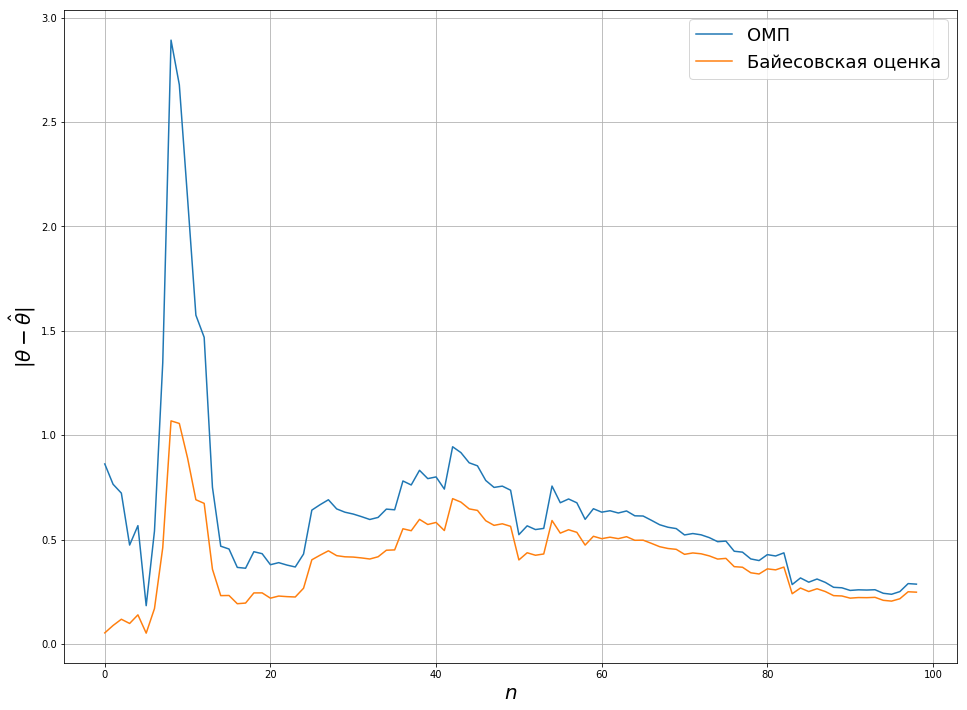

In [75]:
theta = np.zeros(N - 1)

# Вычисляем ОМП
mle = [np.average(sample[:n]) for n in range (1, N)]

# Вычисляем Байесовскую оценку
bayes = [np.sum(sample[:n]) / (1 / sigma_0**2 + n) for n in range (1, N)]

plt.figure(figsize=(16, 12))
plt.plot(abs(mle - theta), label='ОМП')
plt.plot(abs(bayes- theta), label='Байесовская оценка')
plt.xlabel(r'$n$', fontsize = 20)
plt.ylabel(r'$| \theta - \hat{\theta}|$', fontsize = 20)
plt.legend(fontsize = 18)
plt.grid()
plt.show()

# Вывод :

Из графика видно, что байесовская оценка ведёт себя лучше оценки максимального правдоподобия. <br>
Поскольку мы изначально брали выборку из распределения Коши, которое не имеет матожидания, а потом рассматривали это как модель $N(\theta,1)$, то неудивительно, что полученные оценки очень плохие.